In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train = pd.read_csv('/Users/sunmingze/Desktop/Airbnb/train-2.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
Id                                  1000 non-null int64
price                               1000 non-null int64
experiences_offered                 1000 non-null object
host_response_time                  698 non-null object
host_response_rate                  698 non-null float64
host_is_superhost                   1000 non-null object
host_listings_count                 1000 non-null int64
host_identity_verified              1000 non-null object
latitude                            1000 non-null float64
longitude                           1000 non-null float64
property_type                       1000 non-null object
room_type                           1000 non-null object
accommodates                        1000 non-null int64
bathrooms                           999 non-null float64
bedrooms                            999 non-null float64
beds                                999 no

In [4]:
train = train.drop('Id', axis=1)

In [5]:
train['experiences_offered'].value_counts()

none        966
social       10
family       10
romantic      7
business      7
Name: experiences_offered, dtype: int64

In [6]:
cat_var = ['experiences_offered', 'host_response_time', 'host_is_superhost', 'host_identity_verified',
          'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy',
          'require_guest_profile_picture', 'require_guest_phone_verification']
num_var = ['host_response_rate', 'host_listings_count', 'latitude', 'longitude', 'accommodates',
          'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'cleaning_fee', 'guests_included',
          'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating',
          'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
          'review_scores_location', 'review_scores_value', 'reviews_per_month']

In [7]:
# Experimenting with Attributes combinations

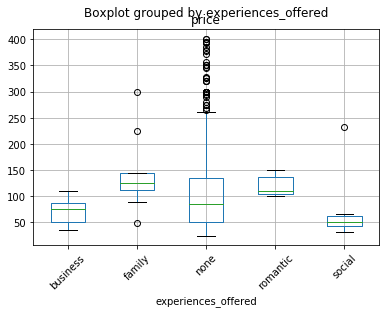

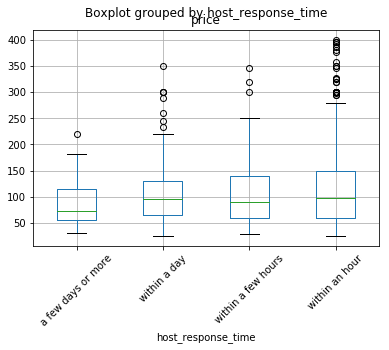

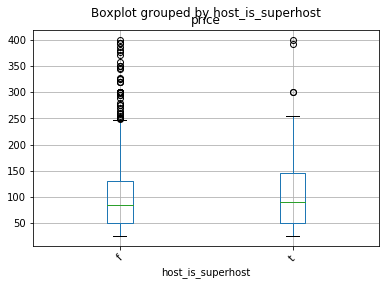

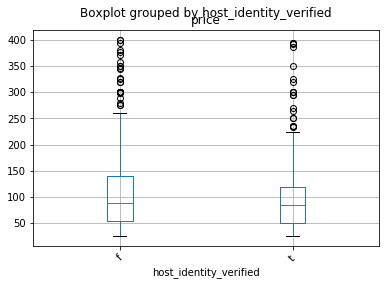

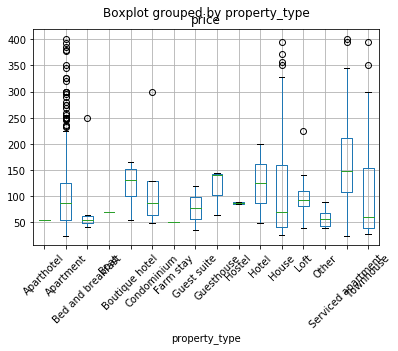

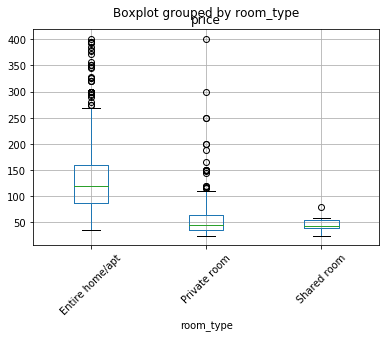

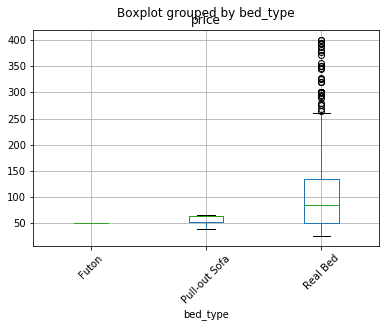

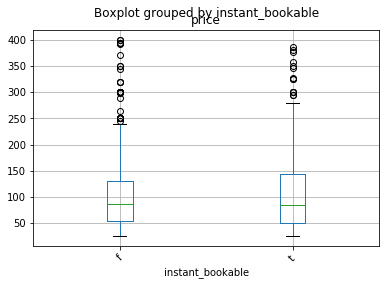

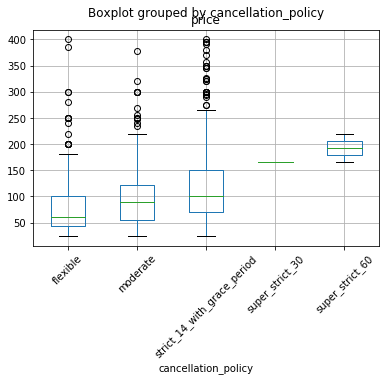

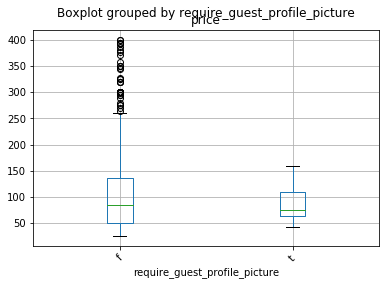

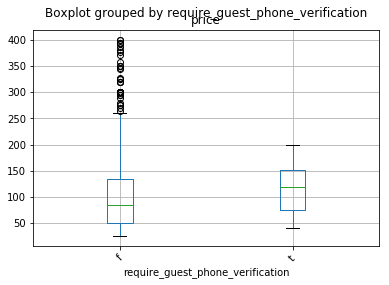

In [8]:
for c in cat_var:
    train.boxplot(column='price', by=c, rot=45, fontsize=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11724c6a0>,
      dtype=object)

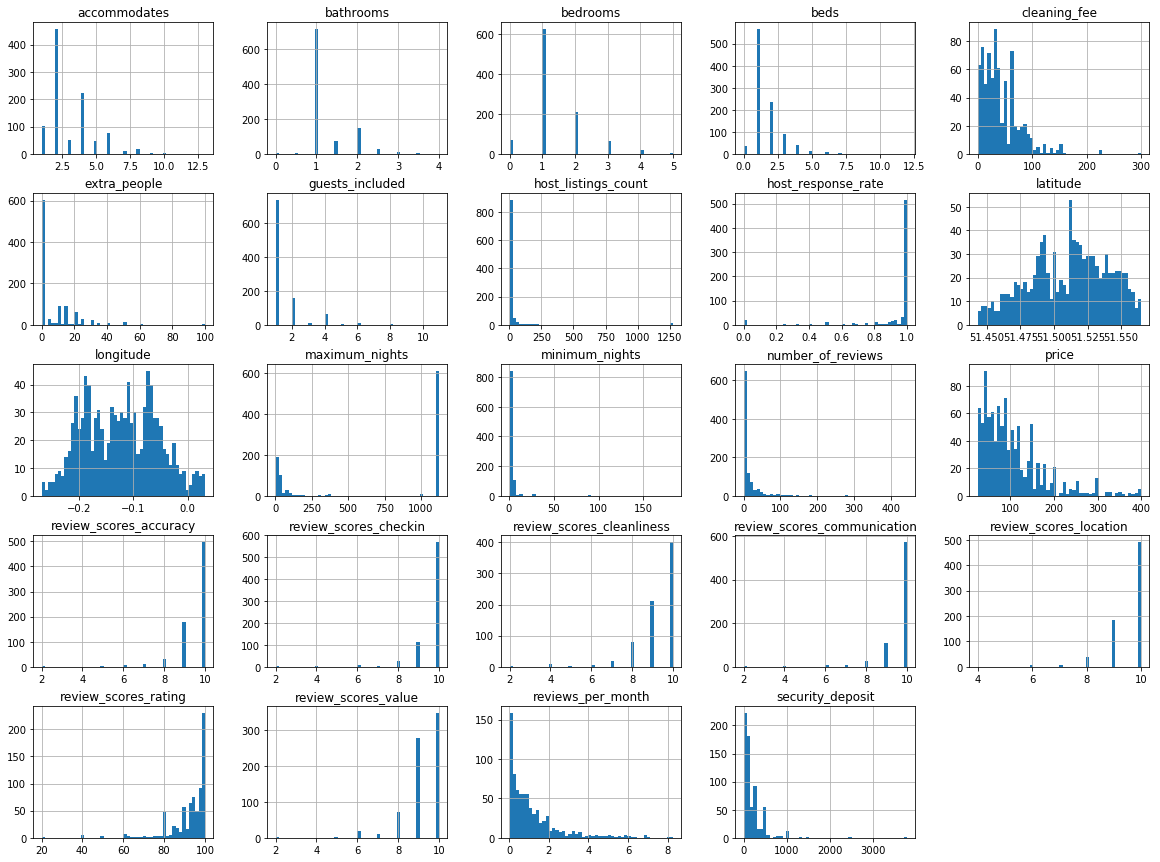

In [9]:
train.hist(bins=50, figsize=(20, 15))

No handles with labels found to put in legend.


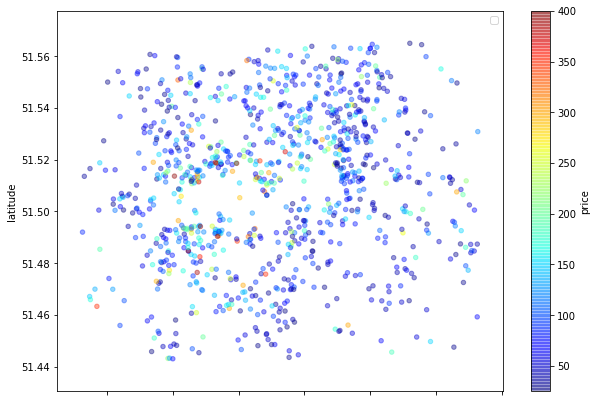

In [10]:
train.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
             figsize=(10,7), c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()

In [11]:
corr_matrix = train.corr()
corr_matrix['price'].sort_values(ascending=False)

price                          1.000000
accommodates                   0.649212
cleaning_fee                   0.586241
beds                           0.531525
bedrooms                       0.529794
bathrooms                      0.473406
guests_included                0.352264
security_deposit               0.282805
host_listings_count            0.236387
maximum_nights                 0.161332
extra_people                   0.083662
host_response_rate             0.055222
review_scores_location         0.023708
review_scores_cleanliness      0.015791
minimum_nights                 0.000786
latitude                      -0.027902
review_scores_checkin         -0.040884
review_scores_accuracy        -0.042076
review_scores_rating          -0.047352
reviews_per_month             -0.050022
review_scores_value           -0.064133
review_scores_communication   -0.083031
number_of_reviews             -0.092377
longitude                     -0.169498
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114700f98>,
      dtype=object)

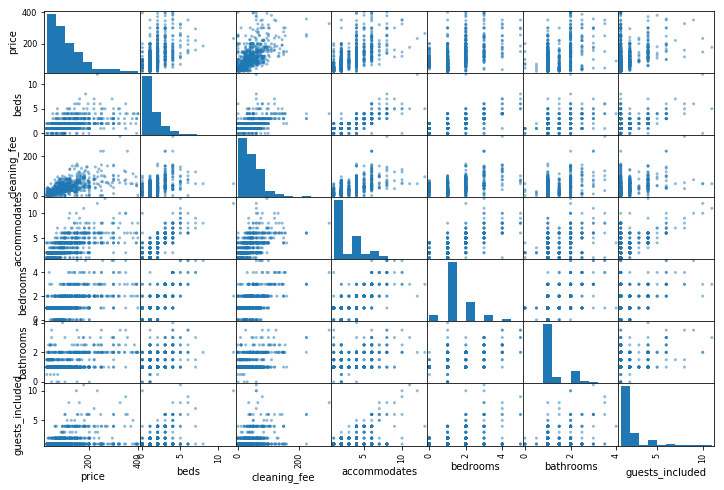

In [12]:
from pandas.plotting import scatter_matrix
attributes = ['price', 'beds', 'cleaning_fee', 'accommodates',
             'bedrooms', 'bathrooms', 'guests_included']
scatter_matrix(train[attributes], figsize=(12, 8))

In [13]:
train.columns

Index(['price', 'experiences_offered', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_identity_verified', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month'],
      dtype='object')

## Prepare the Data for Machine Learning Algorithms

In [16]:
imputer = SimpleImputer(strategy='most_frequent')

In [65]:
# fill missing value of training set
imputer.fit(train)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [66]:
imputer.statistics_

array([100, 'none', 'within an hour', 1.0, 'f', 1, 'f', 51.44302363,
       -0.268727822, 'Apartment', 'Entire home/apt', 2, 1.0, 1.0, 1.0,
       'Real Bed', 0.0, 20.0, 1, 0, 1, 1125, 0, 100.0, 10.0, 10.0, 10.0,
       10.0, 10.0, 10.0, 'f', 'strict_14_with_grace_period', 'f', 'f',
       0.07], dtype=object)

In [67]:
X = imputer.transform(train)
housing_tr = pd.DataFrame(X, columns=train.columns)

In [68]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
price                               1000 non-null object
experiences_offered                 1000 non-null object
host_response_time                  1000 non-null object
host_response_rate                  1000 non-null object
host_is_superhost                   1000 non-null object
host_listings_count                 1000 non-null object
host_identity_verified              1000 non-null object
latitude                            1000 non-null object
longitude                           1000 non-null object
property_type                       1000 non-null object
room_type                           1000 non-null object
accommodates                        1000 non-null object
bathrooms                           1000 non-null object
bedrooms                            1000 non-null object
beds                                1000 non-null object
bed_type                            100

In [21]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_tr[cat_var])

In [22]:
ordinal_encoder.categories_

[array(['business', 'family', 'none', 'romantic', 'social'], dtype=object),
 array(['a few days or more', 'within a day', 'within a few hours',
        'within an hour'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['Aparthotel', 'Apartment', 'Bed and breakfast', 'Boutique hotel',
        'Condominium', 'Guest suite', 'Guesthouse', 'Hostel', 'Hotel',
        'House', 'Loft', 'Other', 'Serviced apartment', 'Townhouse'],
       dtype=object),
 array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['Futon', 'Pull-out Sofa', 'Real Bed'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['flexible', 'moderate', 'strict_14_with_grace_period',
        'super_strict_30', 'super_strict_60'], dtype=object),
 array(['f', 't'], dtype=object),
 array(['f', 't'], dtype=object)]

In [23]:
housing_cat_encoded

array([[2., 3., 0., ..., 2., 0., 0.],
       [2., 3., 0., ..., 0., 0., 0.],
       [2., 3., 0., ..., 0., 0., 0.],
       ...,
       [2., 3., 0., ..., 2., 0., 0.],
       [2., 3., 0., ..., 1., 0., 0.],
       [2., 2., 0., ..., 2., 0., 0.]])

In [69]:
housingDummy = pd.get_dummies(housing_tr,columns=cat_var,prefix=cat_var)
housingDummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 70 columns):
price                                              1000 non-null object
host_response_rate                                 1000 non-null object
host_listings_count                                1000 non-null object
latitude                                           1000 non-null object
longitude                                          1000 non-null object
accommodates                                       1000 non-null object
bathrooms                                          1000 non-null object
bedrooms                                           1000 non-null object
beds                                               1000 non-null object
security_deposit                                   1000 non-null object
cleaning_fee                                       1000 non-null object
guests_included                                    1000 non-null object
extra_people                  

In [70]:
# split train/test data
train_set, test_set = train_test_split(housingDummy, test_size=0.2, random_state=42)
X_train = train_set.drop('price', axis=1)
y_train = train_set['price'].copy()
X_test = test_set.drop('price', axis=1)
y_test = test_set['price'].copy()

In [73]:
# Use Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
lin_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
print(np.sqrt(lin_mse))

45.600815493221006


In [75]:
# model: lasso regression
lasso =Lasso(alpha=0.3)
lasso.fit(X_train, y_train) 

Lasso(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [76]:
lasso_mse = mean_squared_error(y_train, lasso.predict(X_train))
print(np.sqrt(lasso_mse))

46.65420792999249


In [77]:
# model: ridge regression
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [78]:
ridge_mse = mean_squared_error(y_train, ridge.predict(X_train))
print(np.sqrt(ridge_mse))

45.66663559753795


In [79]:
# model: elastic net
elastic_net = ElasticNet(alpha=1,l1_ratio=0.1)
elastic_net.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [80]:
elasticN_mse = mean_squared_error(y_train, elastic_net.predict(X_train))
print(np.sqrt(elasticN_mse))

45.60159947386063


In [81]:
# model: SVM
#svm_poly_reg = SVR(kernel='poly', degree=3, C=100, epsilon=0.1)
#svm_poly_reg.fit(X_train, y_train)

In [82]:
#svm_mse = mean_squared_error(y_train, svm_poly_reg.predict(X_train))
#print(np.sqrt(svm_mse))

In [83]:
def marksOfTrain(X_train, y_train, method):
    print('This is used for measuring training performance:')
    for ref in method:
        ref.fit(X_train, y_train)
        y_pred = ref.predict(X_train)
        print(ref.__class__.__name__, np.sqrt(mean_squared_error(y_train, y_pred)))

In [84]:
method = [lin_reg, lasso, ridge, elastic_net]
marksOfTrain(X_train, y_train, method)

This is used for measuring training performance:
LinearRegression 45.600815493221006
Lasso 46.65420792999249
Ridge 45.66663559753795
ElasticNet 45.60159947386063


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [89]:
def marksOfTest(X_train, y_train, y_test, method):
    print('This is used for measuring test performance:')
    for ref in method:
        ref.fit(X_train, y_train)
        y_pred = ref.predict(X_test)
        print(ref.__class__.__name__, np.sqrt(mean_squared_error(y_test, y_pred)))

In [90]:
marksOfTest(X_train, y_train, y_test, method)

This is used for measuring test performance:
LinearRegression 41.114013035670496
Lasso 40.88271755155554
Ridge 41.05987608726798
ElasticNet 41.108446925309856


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
